# Business Understanding
- An NGO seeks to provide technical support as well as farm inputs to the farmers experiencing extremely low yield in the Karamoja region of Uganda.



# Problem Statement
- The NGO lacks visibility into the overall state of the region and often needs to rely on some very local sources of information to prioritize their activities.
Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of the NGO


# Objectives


- Identify regions with lowest total yield
- Identify regions with lowest sorghum yield per HA
- Identify regions with lowest maize yield per HA
- Correlation between population size and yield
- Correlation between crop area and yield

##  Success criteria
* Understanding the areas that have the lowest yields in order for the NGO to prioritize in terms of resource distribution.

# Data Understanding


In [106]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Loading the data sets
district_crop_yield = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_crop_yield.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [108]:
subcounty_crop_yield = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [109]:
# Checking the structure of the data sets
district_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


In [110]:
subcounty_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   NAME            52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [111]:
# summary of descriptive statistics
district_crop_yield.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


In [112]:
subcounty_crop_yield.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [113]:
# Showing correlation of the numerical columns only and presenting it in a heat map
district_crop_yield.select_dtypes(include='number').corr()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.474371,-0.602633,0.352307,0.696278,0.079865,0.107743,-0.196739,0.132700,-0.078300
POP,-0.474371,1.000000,0.891900,0.024405,-0.032883,0.424930,0.353520,0.562697,0.300750,0.442555
Area,-0.602633,0.891900,1.000000,-0.036377,-0.212716,0.410245,0.310478,0.729935,0.224938,0.574620
S_Yield_Ha,0.352307,0.024405,-0.036377,1.000000,0.565185,0.206778,0.215317,-0.073130,0.370599,0.104401
M_Yield_Ha,0.696278,-0.032883,-0.212716,0.565185,1.000000,0.300017,0.268343,0.212479,0.356662,0.449512
Crop_Area_Ha,0.079865,0.424930,0.410245,0.206778,0.300017,1.000000,0.988370,0.233298,0.952850,0.252674
S_Area_Ha,0.107743,0.353520,0.310478,0.215317,0.268343,0.988370,1.000000,0.083128,0.976447,0.108703
M_Area_Ha,-0.196739,0.562697,0.729935,-0.073130,0.212479,0.233298,0.083128,1.000000,-0.008665,0.946280
S_Prod_Tot,0.132700,0.300750,0.224938,0.370599,0.356662,0.952850,0.976447,-0.008665,1.000000,0.074169
M_Prod_Tot,-0.078300,0.442555,0.574620,0.104401,0.449512,0.252674,0.108703,0.946280,0.074169,1.000000


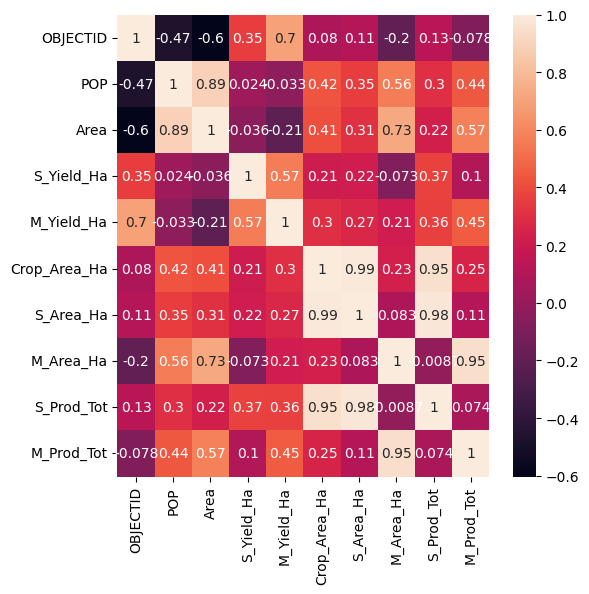

In [114]:
sns.heatmap(district_crop_yield.select_dtypes(include='number').corr(), annot=True)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

In [115]:
subcounty_crop_yield.select_dtypes(include='number').corr()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.413025,0.153613,-0.224381,-0.284216,-0.407773,-0.455794,0.135549,-0.528434,0.117310
POP,-0.413025,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350
Area,0.153613,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690
S_Yield_Ha,-0.224381,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797
M_Yield_Ha,-0.284216,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450
Crop_Area_Ha,-0.407773,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030
S_Area_Ha,-0.455794,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947
M_Area_Ha,0.135549,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444
S_Prod_Tot,-0.528434,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794
M_Prod_Tot,0.117310,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000


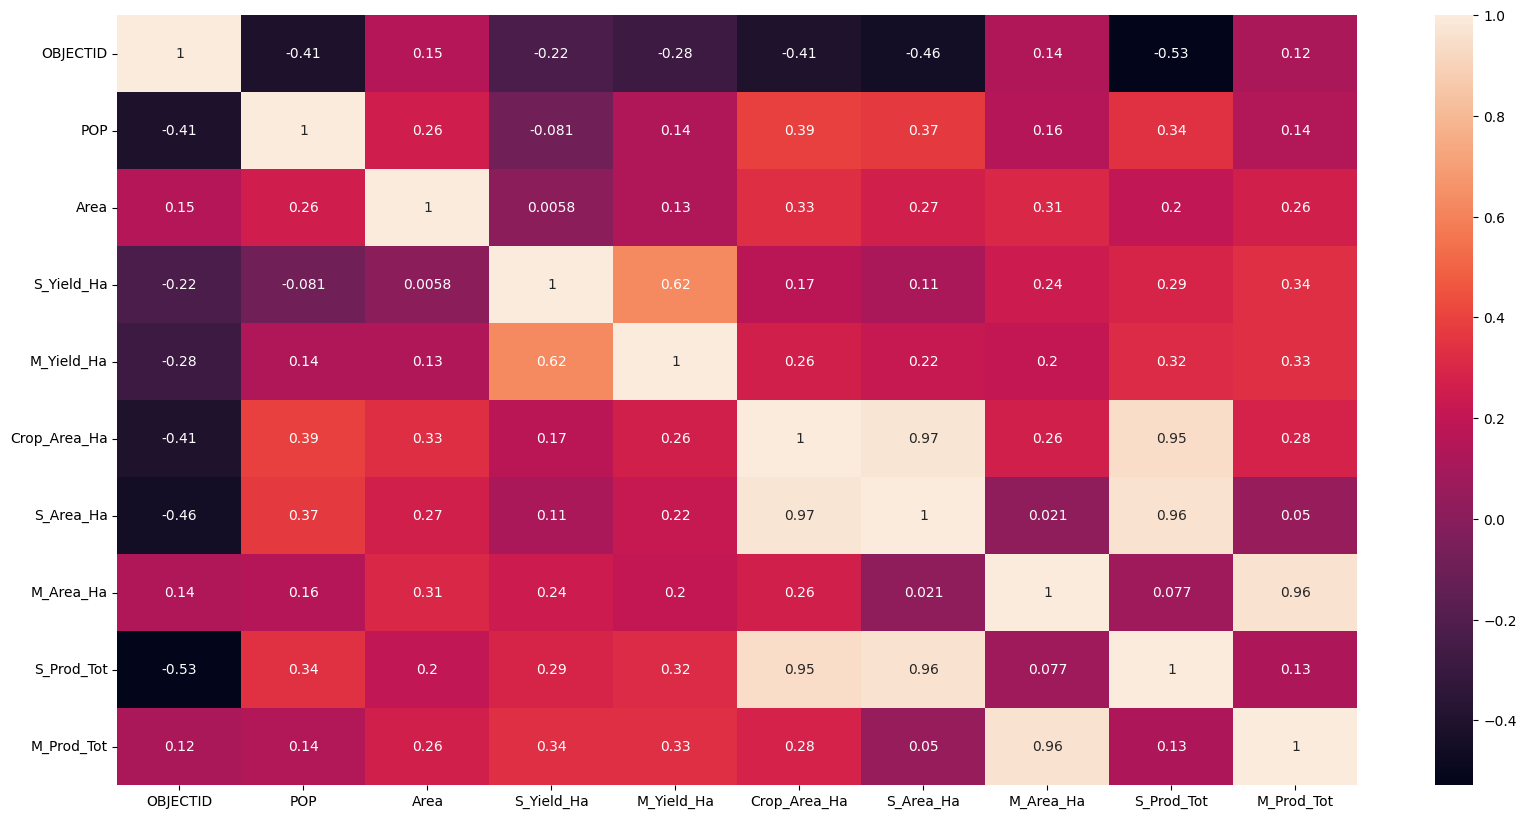

In [116]:
sns.heatmap(subcounty_crop_yield.select_dtypes(include='number').corr(), annot=True)
plt.rcParams['figure.figsize']=(20,10)
plt.show()

# Data Cleaning


In [117]:
# checking for null values
district_crop_yield.isna().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [118]:
subcounty_crop_yield.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


No null values found in both data sets

In [119]:
# Checking columns in each dataset
district_crop_yield.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [120]:
subcounty_crop_yield.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'NAME', 'POP', 'Area', 'Karamoja',
       'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha',
       'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [121]:
# creating new fields to show total production per district and sub-county

In [122]:
district_crop_yield['Total_Yield'] = district_crop_yield['M_Prod_Tot'] + district_crop_yield['S_Prod_Tot']
district_crop_yield.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,3394073
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,4155110
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,12719553
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,18642479
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,1029412


In [123]:
subcounty_crop_yield['Total_Yield'] = subcounty_crop_yield['M_Prod_Tot'] + subcounty_crop_yield['S_Prod_Tot']
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,2.879816e+06
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,5.541496e+06
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,5.714680e+05
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,1.954668e+06
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,4.001549e+06


In [124]:
# Removing duplicates

In [125]:
district_crop_yield.shape

(7, 12)

In [126]:
district_yield_cleaned = district_crop_yield.drop_duplicates()
district_yield_cleaned.shape

(7, 12)

In [127]:
subcounty_crop_yield.shape

(52, 14)

In [128]:
subcounty_yield_cleaned = subcounty_crop_yield.drop_duplicates()
subcounty_yield_cleaned.shape

(52, 14)

The data sets do not have duplicate values

# EDA - Exploratory data analysis


In [129]:
# Checking regions with lowest yield

In [130]:
# 4 districts with least yield overally
district_yield_cleaned = district_yield_cleaned.sort_values(by='Total_Yield')
print(district_yield_cleaned.head(4)['NAME'])

4    MOROTO
0      ABIM
1    AMUDAT
6     NAPAK
Name: NAME, dtype: object


/tmp/ipython-input-835692995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_yield_cleaned, x='NAME', y='Total_Yield', palette='viridis')


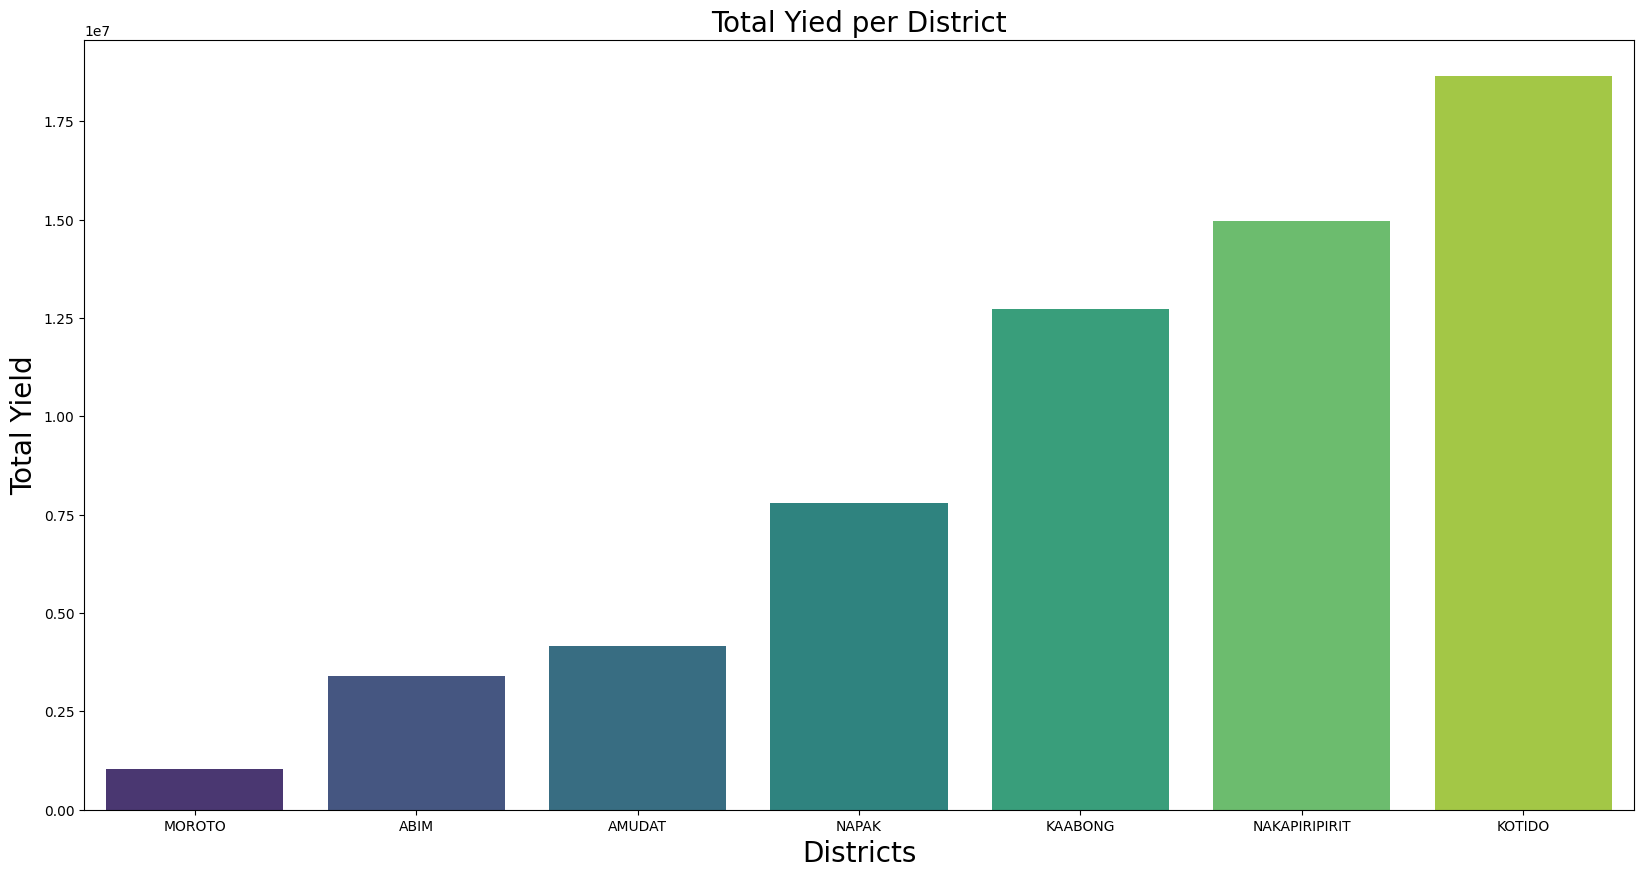

In [131]:
# Presenting Disrict yield in a bar graph
sns.barplot(data=district_yield_cleaned, x='NAME', y='Total_Yield', palette='viridis')
plt.title('Total Yied per District', fontsize=20)
plt.xlabel('Districts', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.show()

In [132]:
# 10 subcounties with the least yield
subcounty_yield_cleaned = subcounty_yield_cleaned.sort_values(by='Total_Yield')
print(subcounty_yield_cleaned.head(10)['SUBCOUNTY_NAME'])

33             SOUTHERN DIVISION
32             NORTHERN DIVISION
28           AMUDAT TOWN COUNCIL
35    NAKAPIRIPIRIT TOWN COUNCIL
7           KAABONG TOWN COUNCIL
29                    KATIKEKILE
15                        LODIKO
6                  KAABONG  EAST
47                     NGOLERIET
31                         TAPAC
Name: SUBCOUNTY_NAME, dtype: object


/tmp/ipython-input-42812915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='Total_Yield', palette='magma')


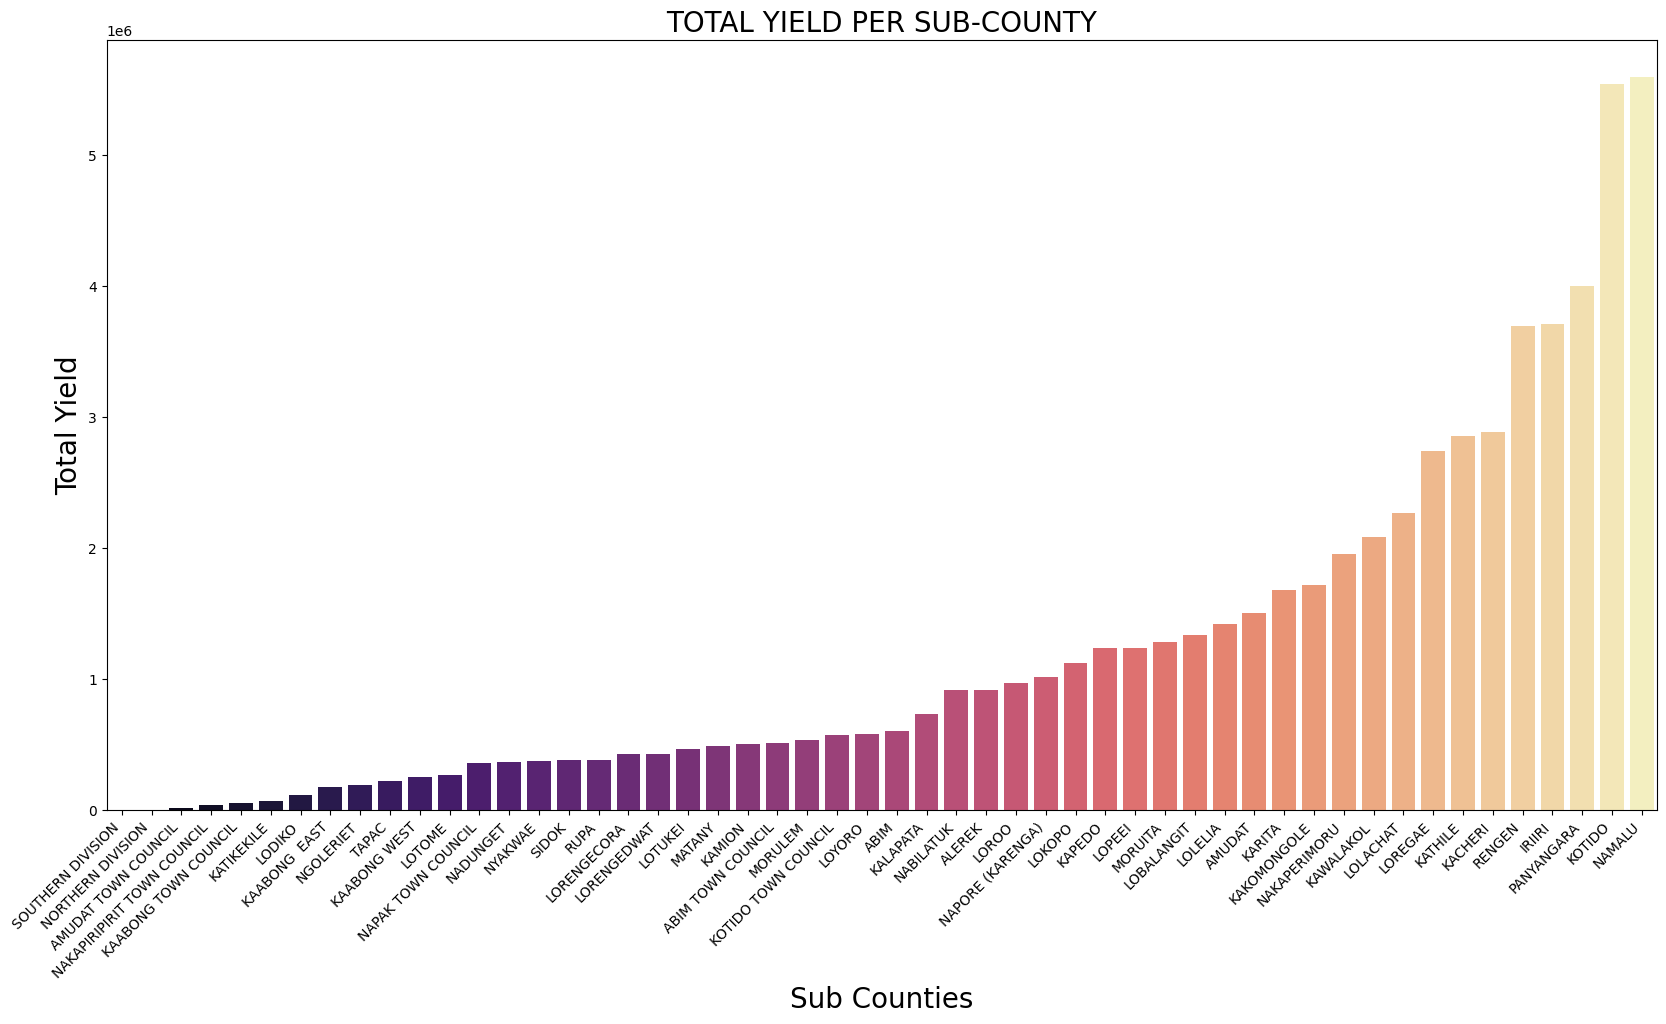

In [133]:
# Presenting subcounty yield in a bargraph
sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='Total_Yield', palette='magma')
plt.title('TOTAL YIELD PER SUB-COUNTY', fontsize=20)
plt.xlabel('Sub Counties', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [134]:
# Lowest sorghum yield district and subcounty wise
district_yield_cleaned = district_yield_cleaned.sort_values(by='S_Yield_Ha')
print(district_yield_cleaned.head(4)['NAME'])

4     MOROTO
6      NAPAK
1     AMUDAT
2    KAABONG
Name: NAME, dtype: object


/tmp/ipython-input-789778618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_yield_cleaned, x='NAME', y='S_Yield_Ha', palette='Blues')


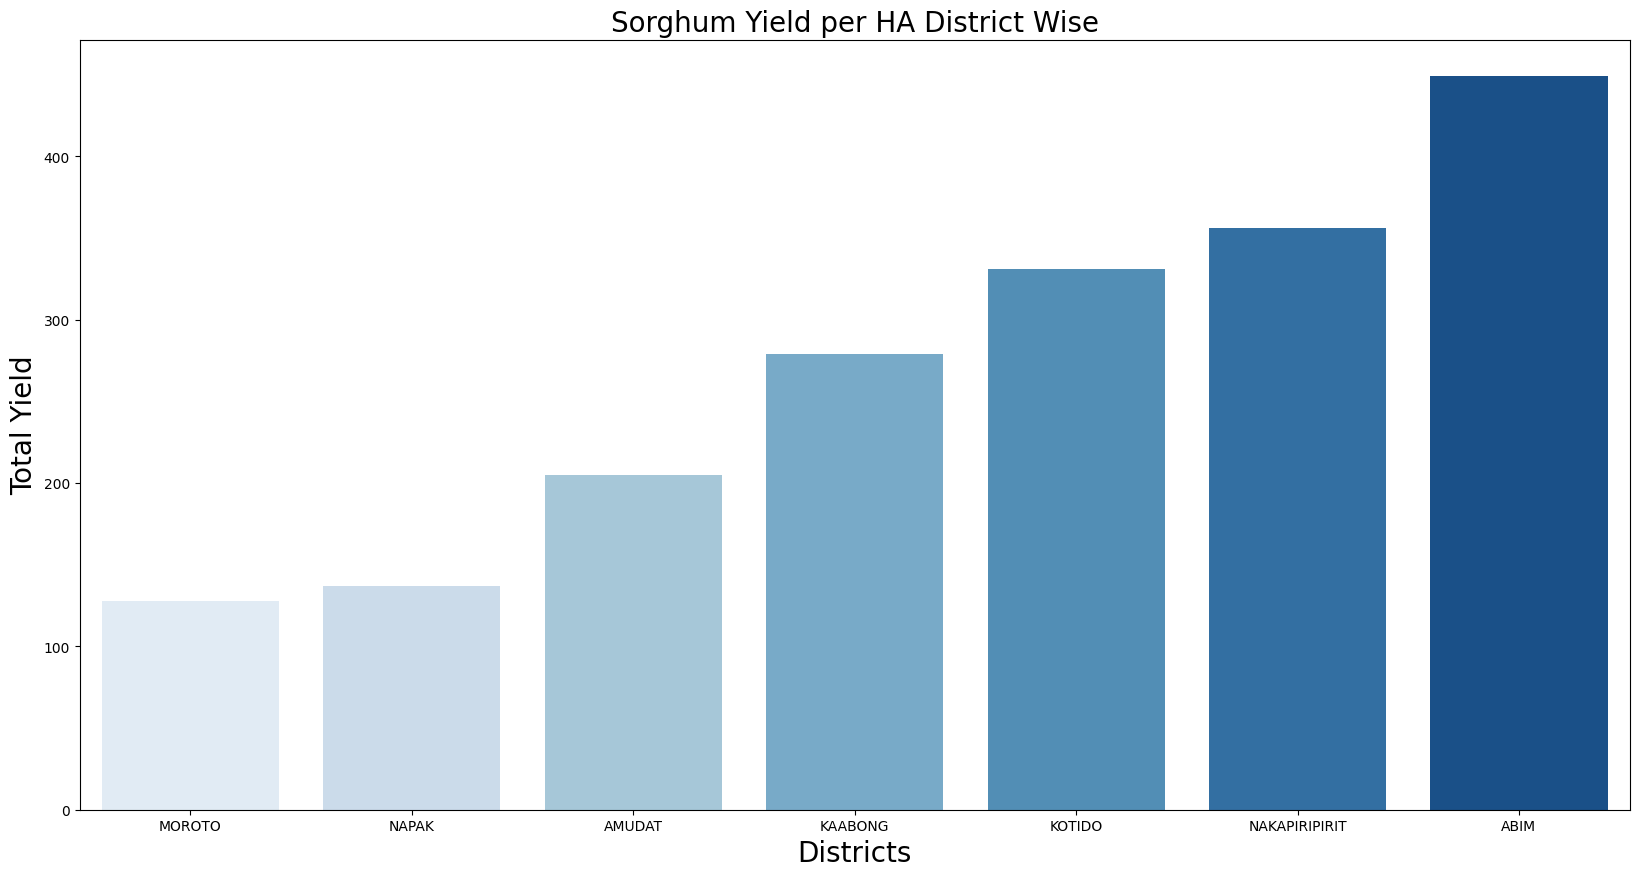

In [135]:
# Presenting district sorghum yield in a bargraph
sns.barplot(data=district_yield_cleaned, x='NAME', y='S_Yield_Ha', palette='Blues')
plt.title('Sorghum Yield per HA District Wise', fontsize=20)
plt.xlabel('Districts', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.show()

In [136]:
subcounty_yield_cleaned = subcounty_yield_cleaned.sort_values(by='S_Yield_Ha')
print(subcounty_yield_cleaned.head(10)['SUBCOUNTY_NAME'])

42                 LOPEEI
50                   RUPA
33      SOUTHERN DIVISION
49                 LOKOPO
44                 LOTOME
45                 MATANY
32      NORTHERN DIVISION
30               NADUNGET
47              NGOLERIET
28    AMUDAT TOWN COUNCIL
Name: SUBCOUNTY_NAME, dtype: object


/tmp/ipython-input-3969300282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='S_Yield_Ha', palette='Greens')


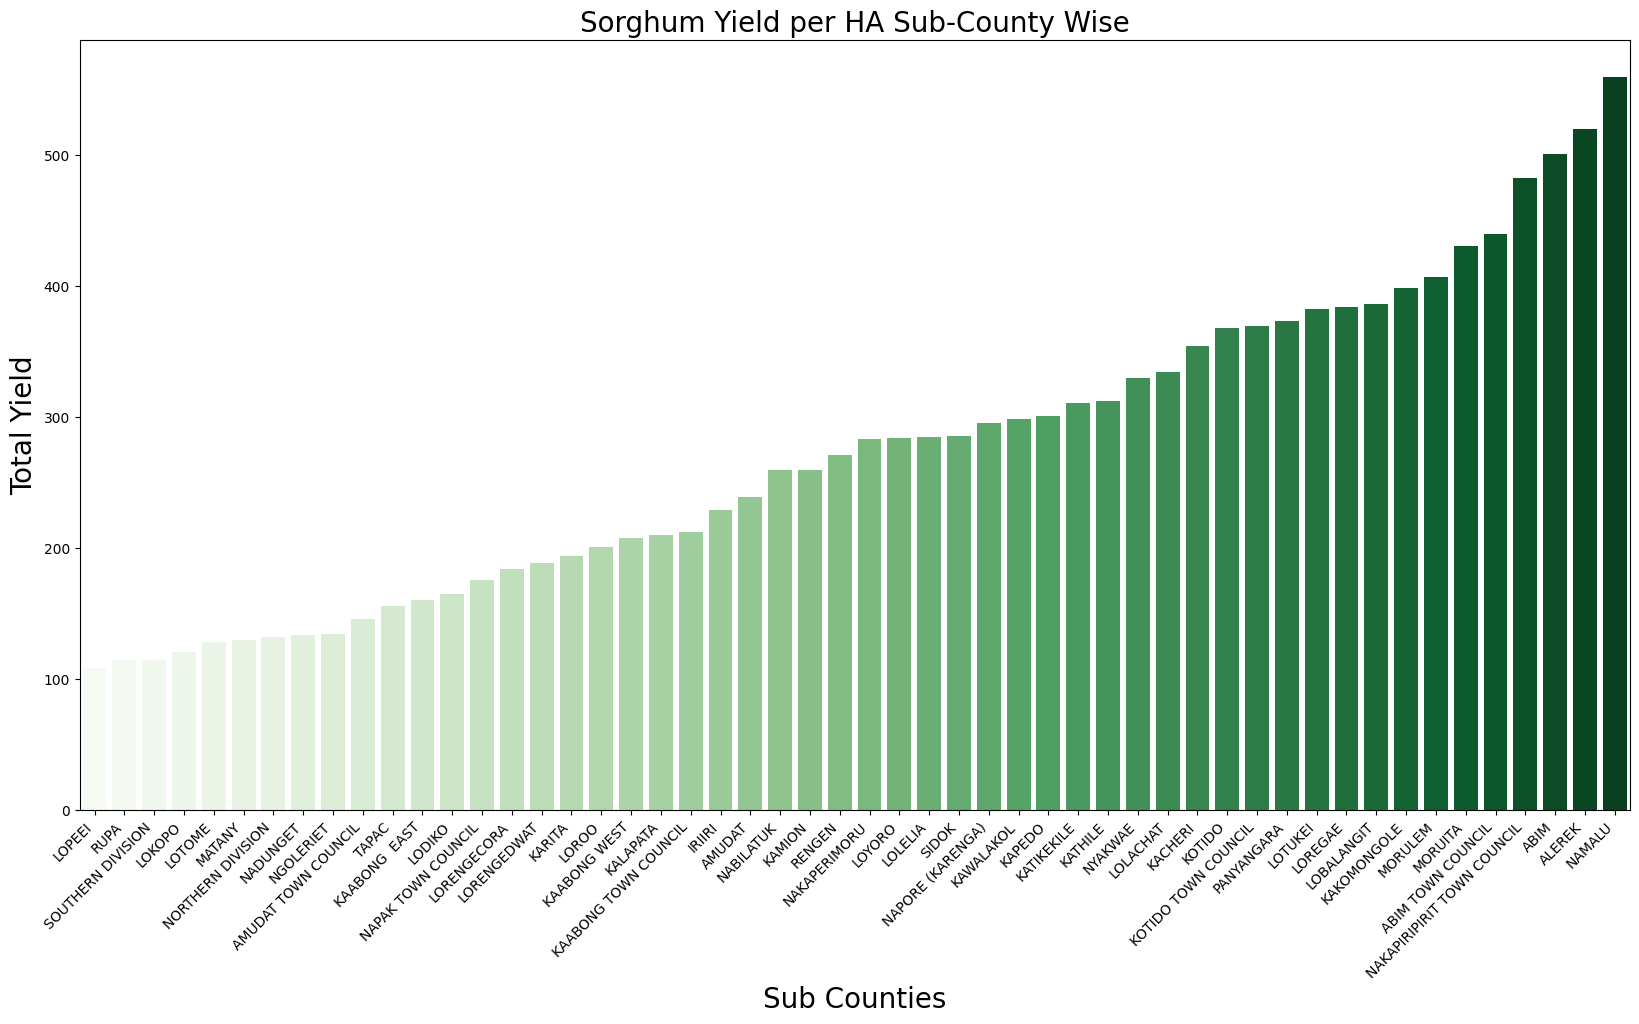

In [137]:
# Presenting subcounty sorghum yield in a bargraph
sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='S_Yield_Ha', palette='Greens')
plt.title('Sorghum Yield per HA Sub-County Wise', fontsize=20)
plt.xlabel('Sub Counties', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [138]:
# Lowest maize yield district and subcounty wise
district_yield_cleaned = district_yield_cleaned.sort_values(by='M_Yield_Ha')
print(district_yield_cleaned.head(4)['NAME'])

4     MOROTO
6      NAPAK
2    KAABONG
0       ABIM
Name: NAME, dtype: object


/tmp/ipython-input-1018214609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_yield_cleaned, x='NAME', y='M_Yield_Ha', palette='Oranges')


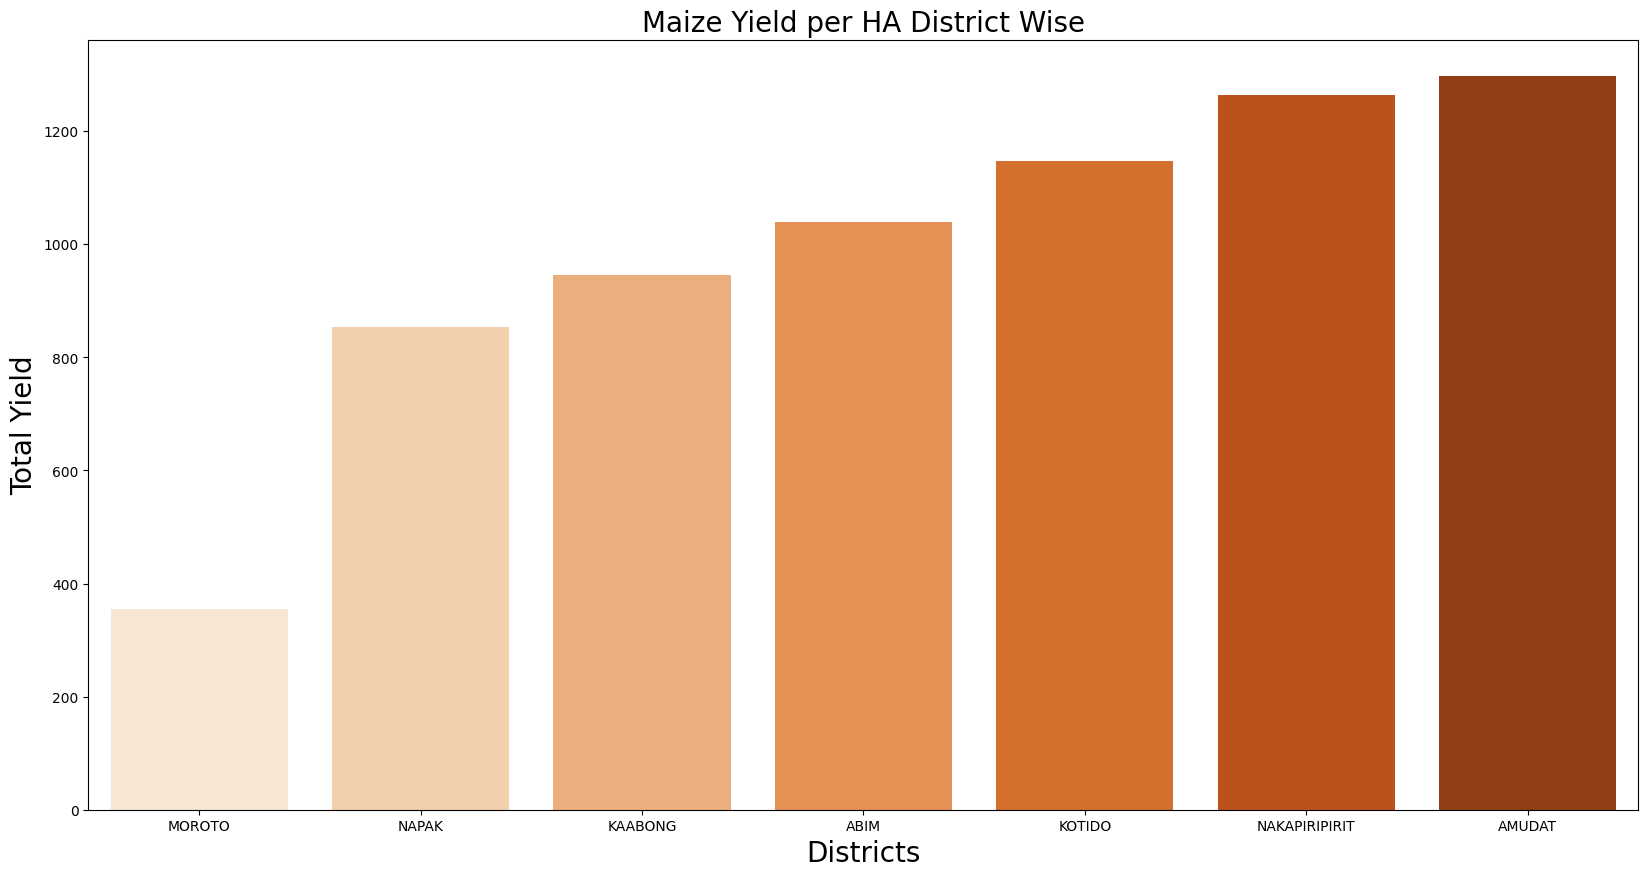

In [139]:
# Presenting district maize yield in a bargraph
sns.barplot(data=district_yield_cleaned, x='NAME', y='M_Yield_Ha', palette='Oranges')
plt.title('Maize Yield per HA District Wise', fontsize=20)
plt.xlabel('Districts', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.show()

In [140]:
subcounty_yield_cleaned = subcounty_yield_cleaned.sort_values(by='M_Yield_Ha')
print(subcounty_yield_cleaned.head(10)['SUBCOUNTY_NAME'])

33    SOUTHERN DIVISION
31                TAPAC
32    NORTHERN DIVISION
45               MATANY
44               LOTOME
47            NGOLERIET
29           KATIKEKILE
30             NADUNGET
9              KALAPATA
6         KAABONG  EAST
Name: SUBCOUNTY_NAME, dtype: object


/tmp/ipython-input-274842660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='M_Yield_Ha', palette='Purples')


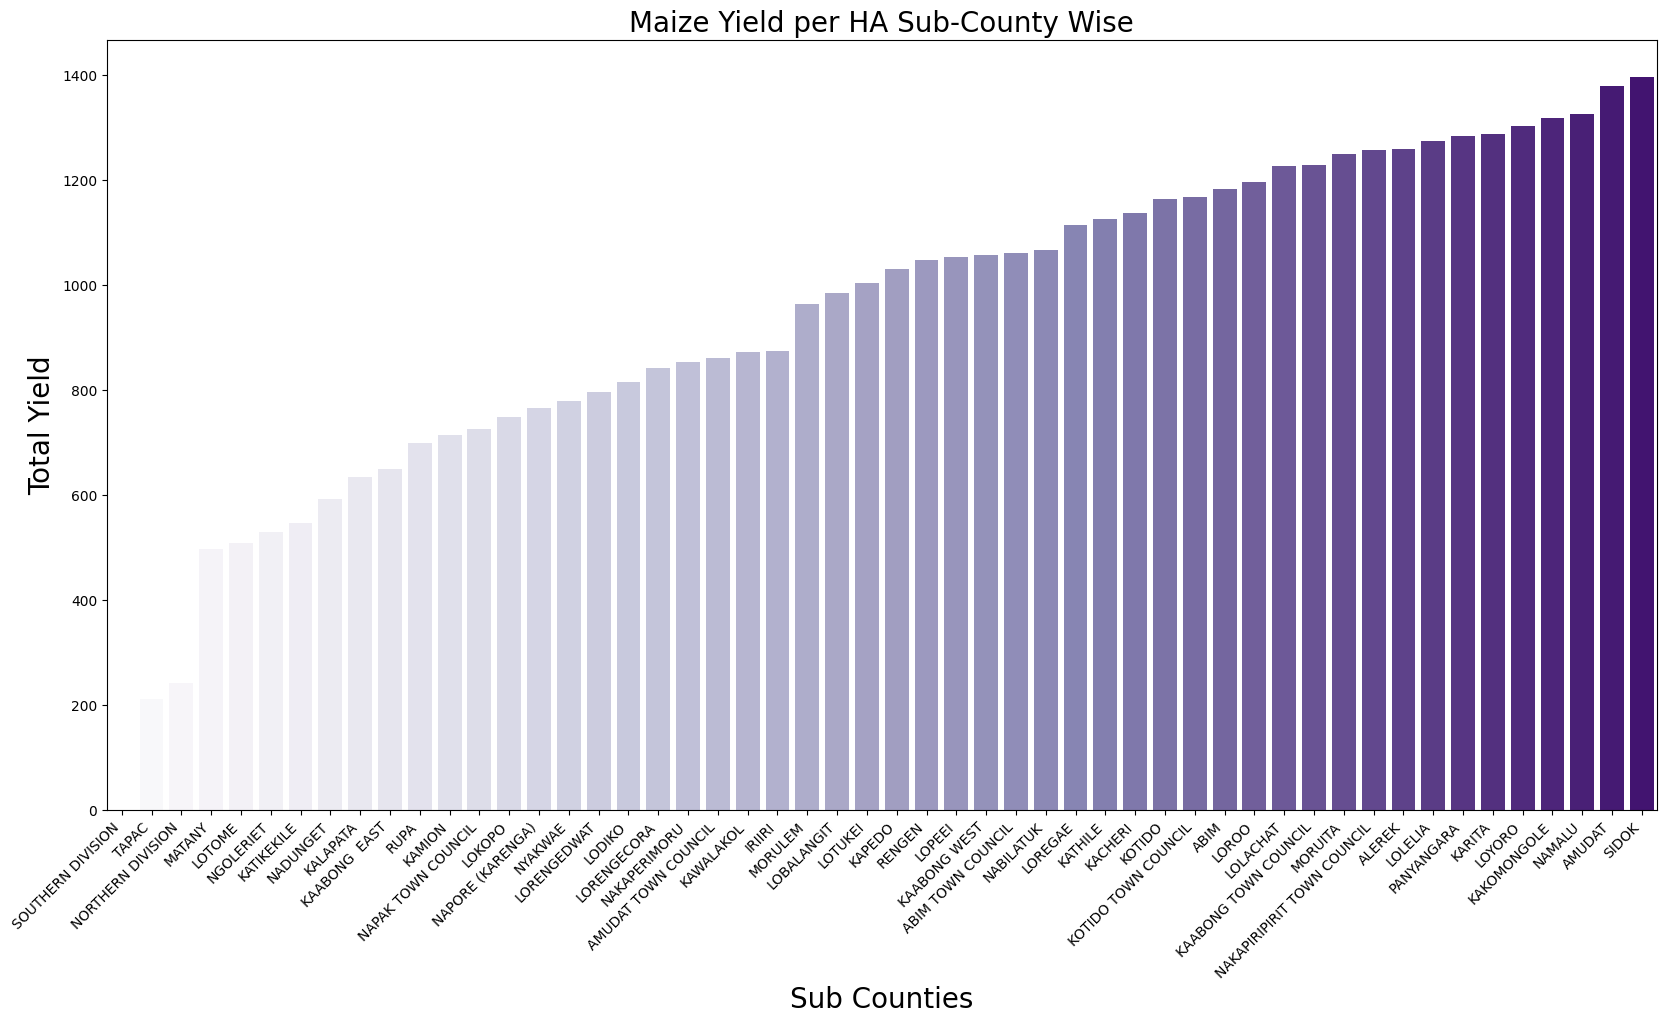

In [141]:
# Presenting subcounty maize yield in a bargraph
sns.barplot(subcounty_yield_cleaned, x='SUBCOUNTY_NAME', y='M_Yield_Ha', palette='Purples')
plt.title('Maize Yield per HA Sub-County Wise', fontsize=20)
plt.xlabel('Sub Counties', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

np.float64(0.45382503719095757)

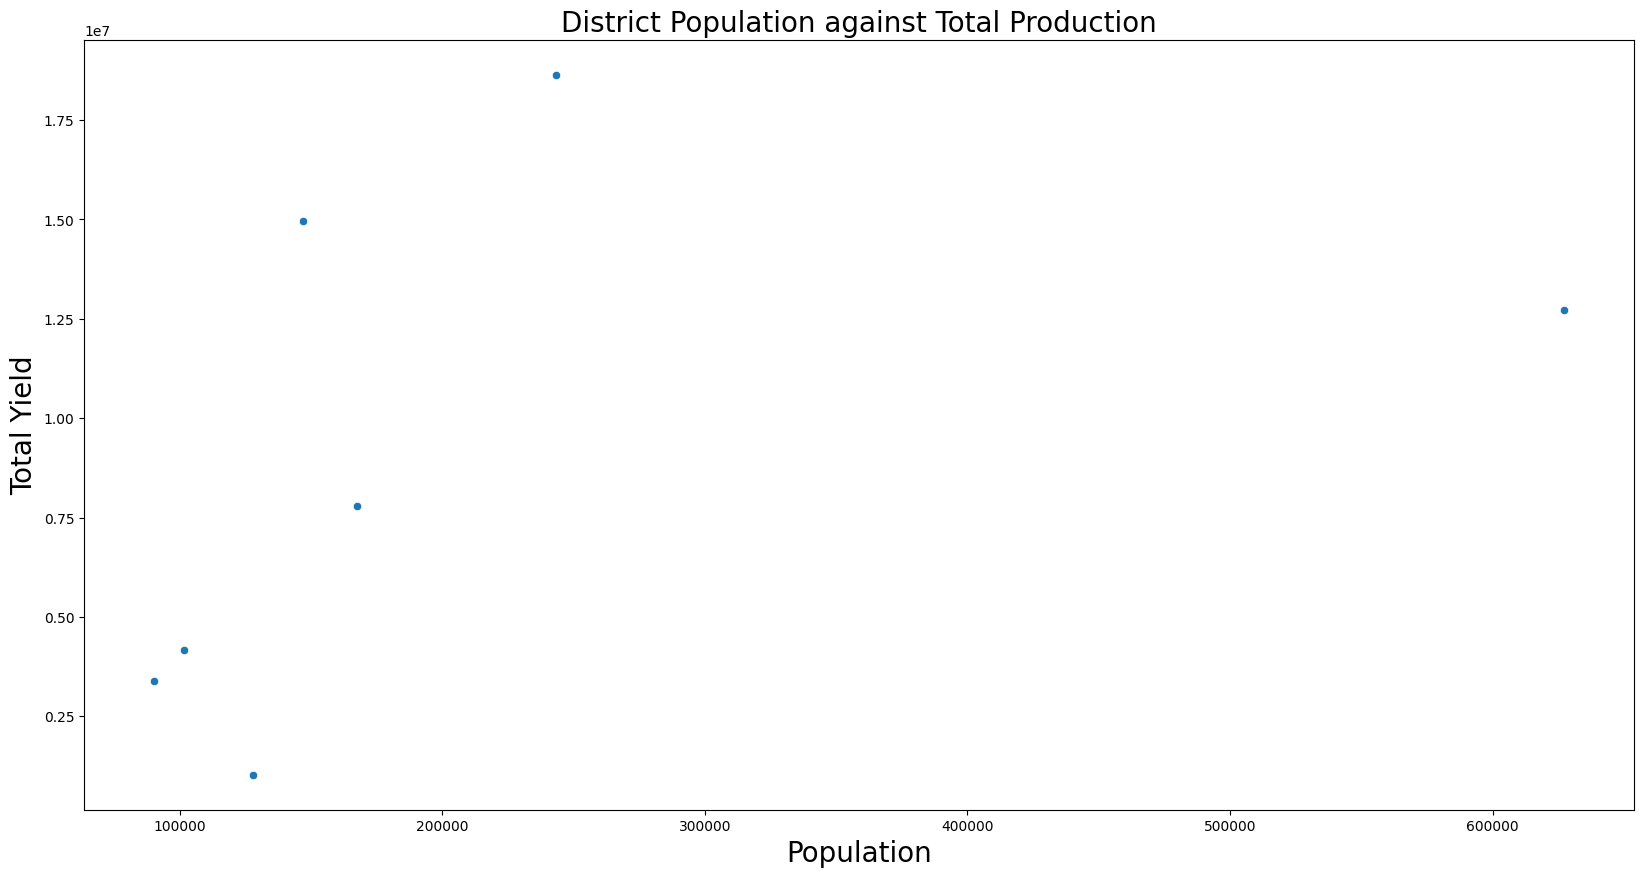

In [142]:
# Correlation between population and total production
sns.scatterplot(data=district_yield_cleaned, x='POP', y='Total_Yield')
plt.title('District Population against Total Production', fontsize=20)
plt.xlabel('Population', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
np.corrcoef(district_yield_cleaned['POP'],district_yield_cleaned['Total_Yield'])[0,1]

np.float64(0.33753513033680205)

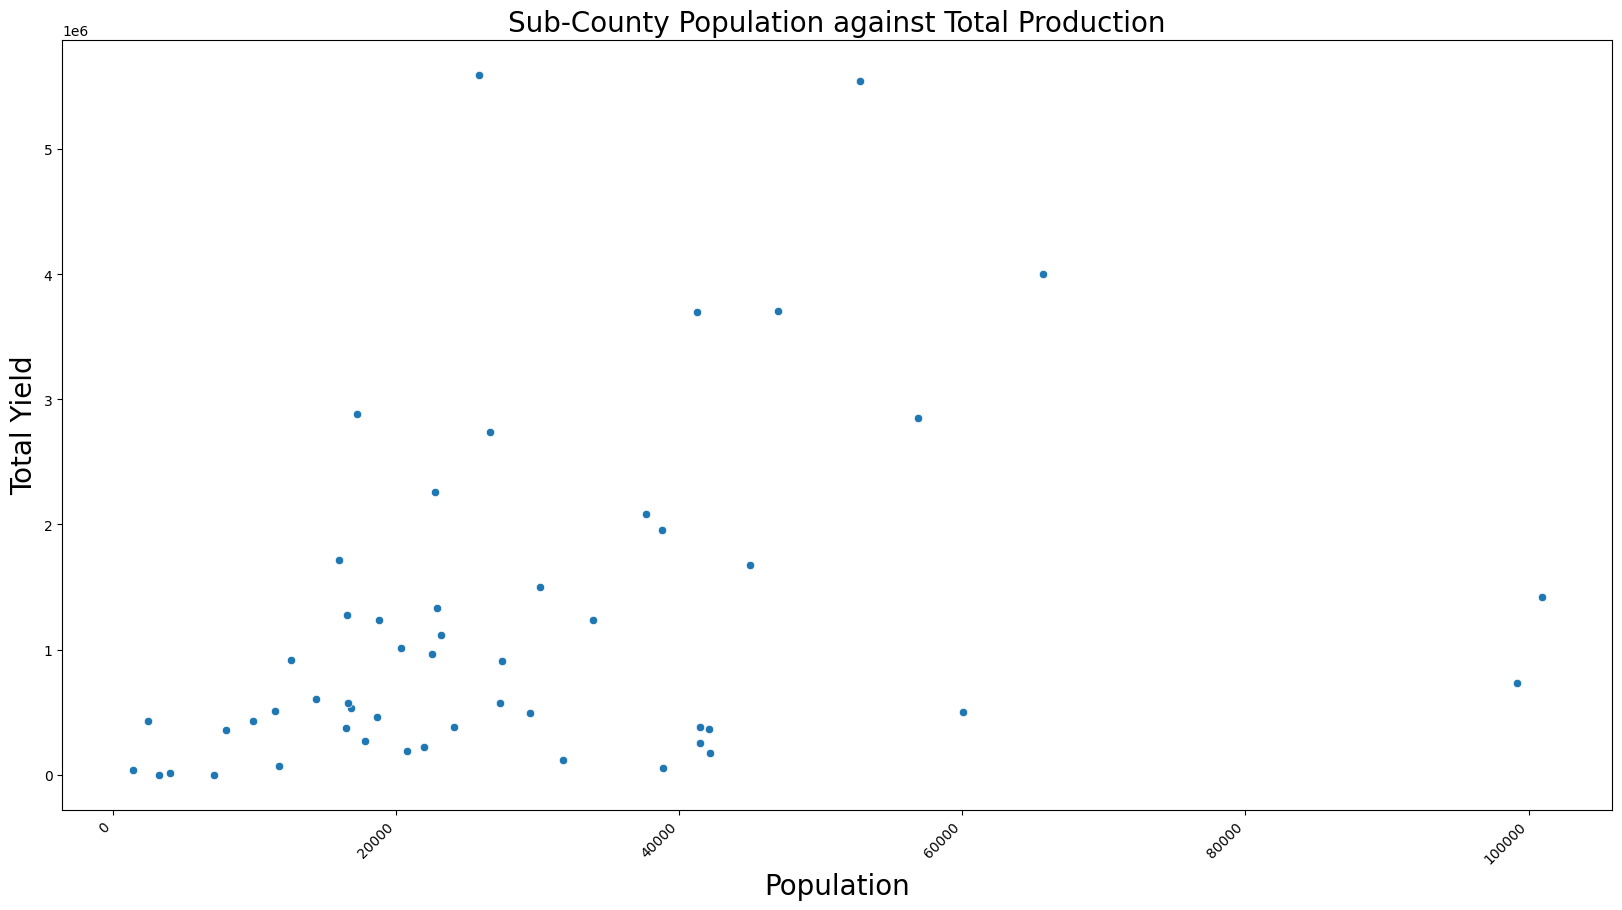

In [143]:
sns.scatterplot(data=subcounty_yield_cleaned, x='POP', y='Total_Yield')
plt.title('Sub-County Population against Total Production', fontsize=20)
plt.xlabel('Population', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.xticks(rotation=45, ha='right')
np.corrcoef(subcounty_yield_cleaned['POP'],subcounty_yield_cleaned['Total_Yield'])[0,1]

np.float64(0.937657877569079)

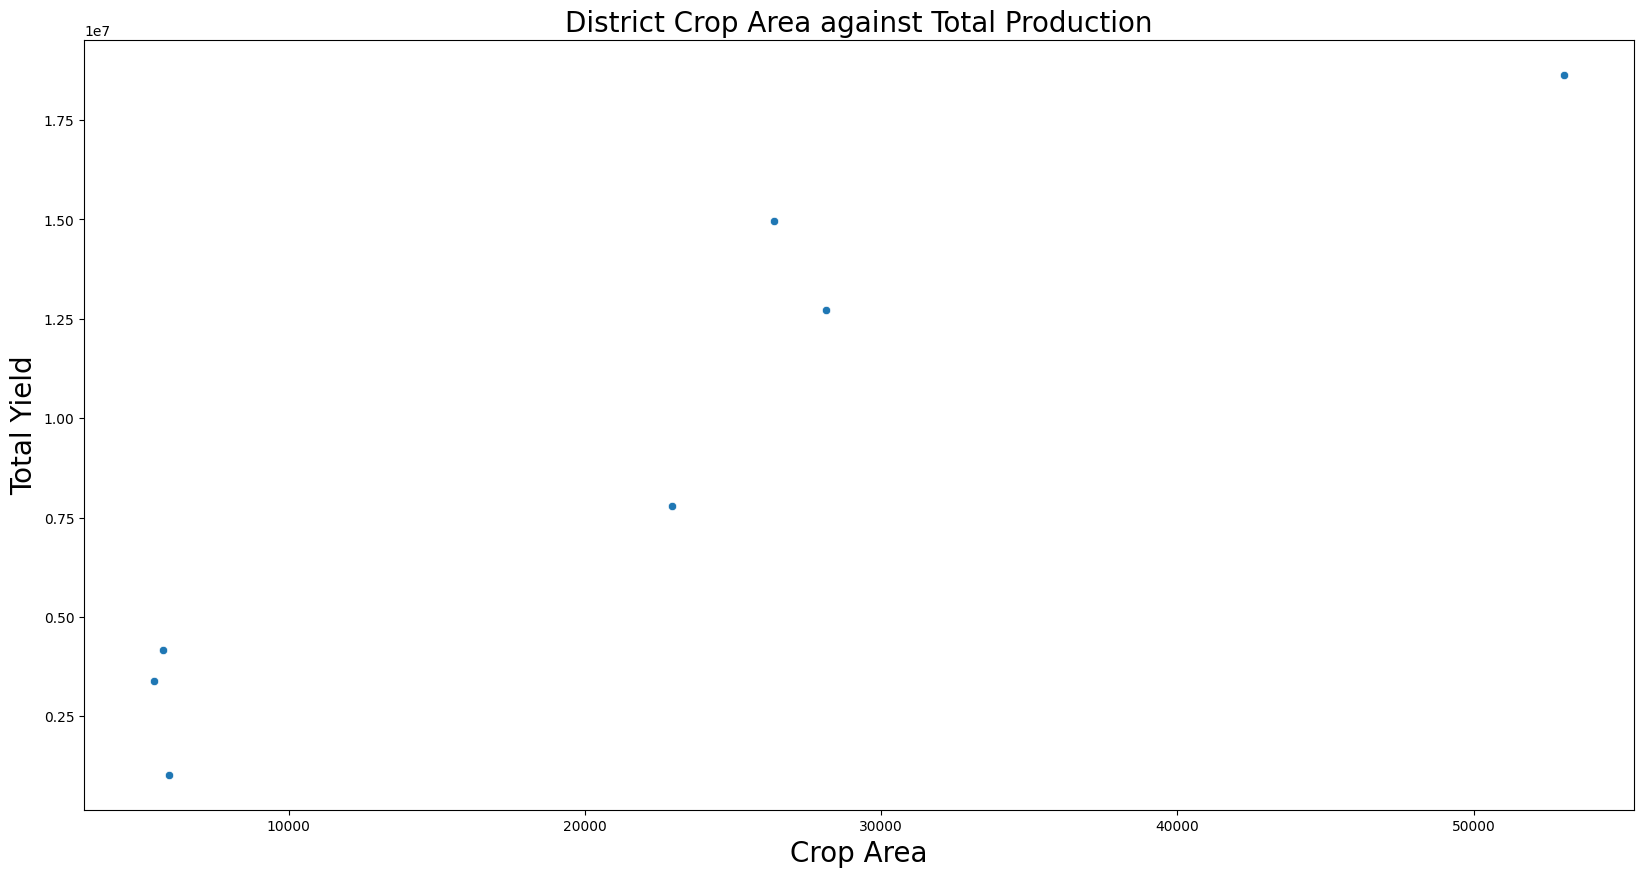

In [144]:
# Correlation between crop area and total production
sns.scatterplot(data=district_yield_cleaned, x='Crop_Area_Ha', y='Total_Yield')
plt.title('District Crop Area against Total Production', fontsize=20)
plt.xlabel('Crop Area', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
np.corrcoef(district_yield_cleaned['Crop_Area_Ha'],district_yield_cleaned['Total_Yield'])[0,1]

np.float64(0.862170200591406)

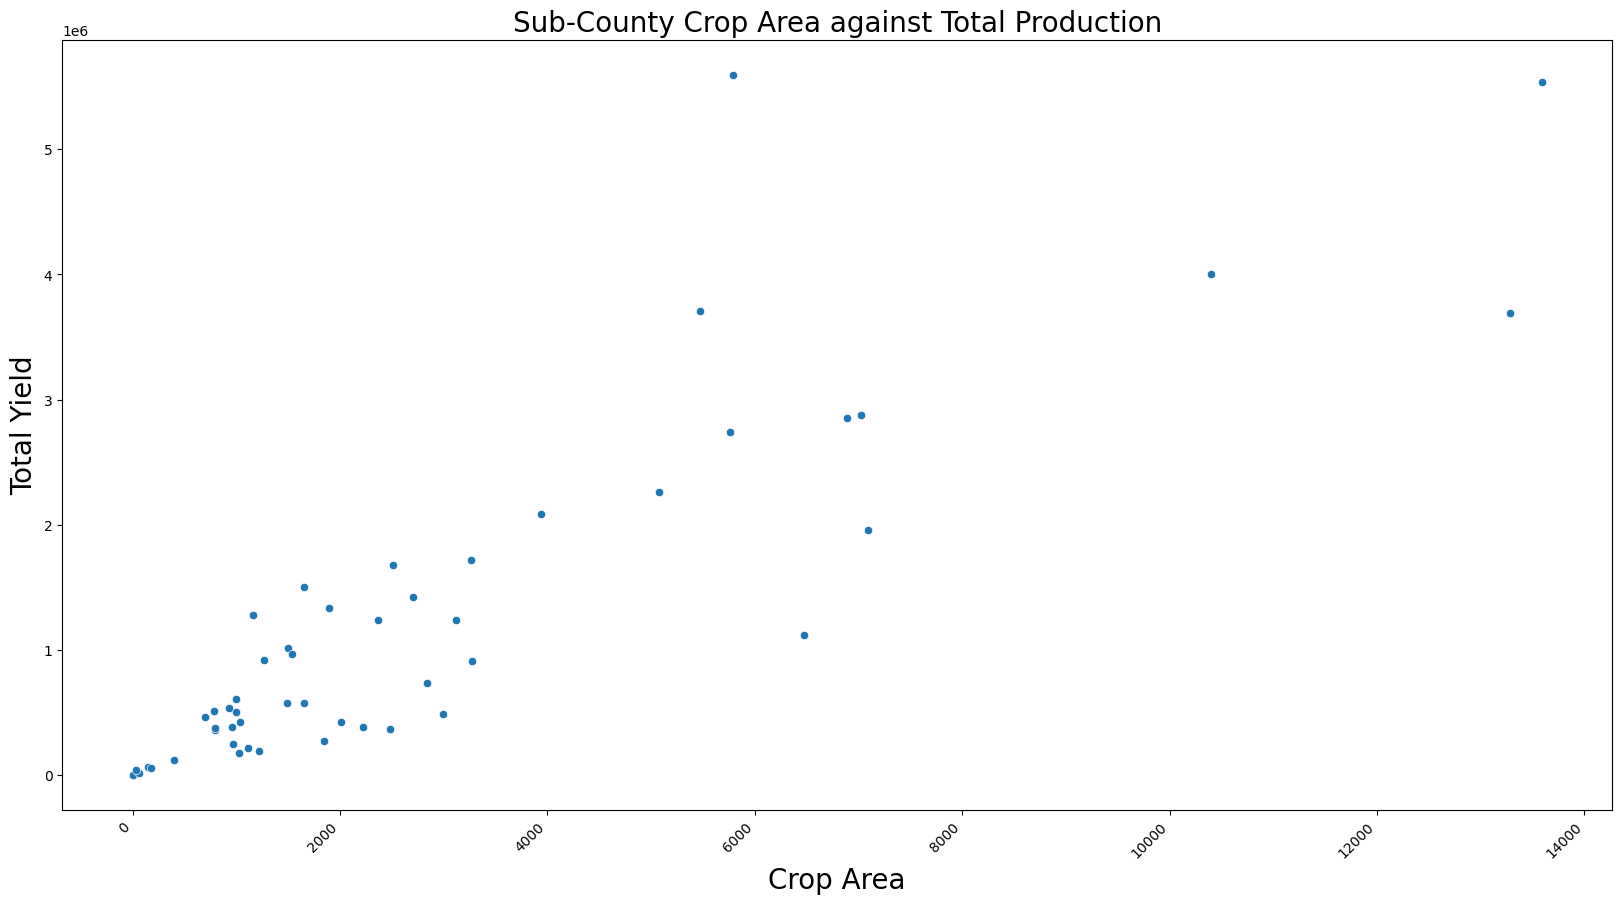

In [145]:
sns.scatterplot(data=subcounty_yield_cleaned, x='Crop_Area_Ha', y='Total_Yield')
plt.title('Sub-County Crop Area against Total Production', fontsize=20)
plt.xlabel('Crop Area', fontsize=20)
plt.ylabel('Total Yield', fontsize=20)
plt.xticks(rotation=45, ha='right')
np.corrcoef(subcounty_yield_cleaned['Crop_Area_Ha'],subcounty_yield_cleaned['Total_Yield'])[0,1]

## Key Findings
- 4 Districts with lowest total yield:

     * MOROTO
     * ABIM
     * AMUDAT
     * NAPAK

- 10 Sub-Counties with lowest total yield:

     * SOUTHERN DIVISION
     * NORTHERN DIVISION
     * AMUDAT TOWN COUNCIL
     * NAKAPIRIPIRIT TOWN COUNCIL
     * KAABONG TOWN COUNCIL
     * KATIKEKILE
     * LODIKO
     * KAABONG  EAST
     * NGOLERIET
     * TAPAC

- 4 Districts with lowest sorghum yield per HA:

    * MOROTO
    * NAPAK
    * AMUDAT
    * KAABONG

- 10 Sub-Counties with lowest sorghum yield per HA:

     * LOPEEI
     * RUPA
     * SOUTHERN DIVISION
     * LOKOPO
     * LOTOME
     * MATANY
     * NORTHERN DIVISION
     * NADUNGET
     * NGOLERIET
     * AMUDAT TOWN COUNCIL

- 4 Districts with lowest maize yield per HA:

     * MOROTO
     * NAPAK
     * KAABONG
     * ABIM

- 10 Sub-Counties with lowest maize yield per HA:

     * SOUTHERN DIVISION
     * TAPAC
     * NORTHERN DIVISION
     * MATANY
     * LOTOME
     * NGOLERIET
     * KATIKEKILE
     * NADUNGET
     * KALAPATA
     * KAABONG  EAST

- Correlation between population size and total yield

There is a weak but positive correlation between population size and total yield.

- Correlation between crop area and total yield

There is a strong and positive correlation between crop area and total yield.

# Conclusions
1. Regions with Lowest Total Yield

The analysis highlights the following districts and sub-counties with the lowest total yield.

  * Districts: Moroto, Abim, Amudat, and Napak.

  * Sub-Counties: Southern Division, Northern Division, Amudat Town Council, Nakapiripirit Town Council, Kaabong Town Council, Katikekile, Lodiko, Kaabong East, Ngoleriet, and Tapac.

2.  Regions with Lowest Maize Yield per HA

The analysis identifies the following districts and sub-counties that are struggling specifically with sorghum production.

  * Districts: Moroto, Napak, Amudat, and Kaabong.

  * Sub-Counties: Lopeei, Rupa, Southern Division, Lokopo, Lotome, Matany, Northern Division, Nadunget, Ngoleriet, and Amudat Town Council.

3.  Regions with Lowest Maize Yield per HA
The findings point to the districts and sub-counties with the lowest maize yields per hectare as follows:

  * Districts: Moroto, Napak, Kaabong, and Abim.

  * Sub-Counties: Southern Division, Tapac, Northern Division, Matany, Lotome, Ngoleriet, Katikekile, Nadunget, Kalapata, and Kaabong East.

4.  There is a weak but positive correlation between population size and total yield, suggesting that as the population increases, total yield tends to increase as well.

5. The more area a region has allocated for crops, the higher the chance of a bigger yield.

# Recommendations and Next steps
1.  If the organization has limited resources, focus should be made on the most affected areas first before proceeding to the other areas in the region.
2. As the region also suffers from pests and disease outbreak, it would be important to explore the effect of these on crop production in the different regions as well.
3. It is important to also analyze the impact of farming practices used across the different regions crop yields.
4. Population is a huge factor in farming. It is worth exploring how population density and not just the absolute numbers, affects productivity.
